In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from recommenders.models.surprise.surprise_utils import predict
from recommenders.evaluation.python_evaluation import rmse, mae
from surprise import accuracy

In [6]:
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df.head()

100%|██████████| 4.81k/4.81k [00:02<00:00, 2.16kKB/s]


,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [9]:
reader = Reader(rating_scale=(df.rating.min(), df.rating.max()))
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [20]:
n_factors = 100
n_epochs = 20
lr_all = 0.005
reg_all = 0.02

rmse_list = []
mae_list = []
mse_list = []

with Timer() as t:
    for i in range(10):
        reader = Reader(rating_scale=(df.rating.min(), df.rating.max()))
        data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)
        trainset, testset = train_test_split(data, test_size=0.2, random_state=i)

        model = SVD(
            n_factors=n_factors,
            n_epochs=n_epochs,
            lr_all=lr_all,
            reg_all=reg_all,
            random_state=i
        )
        model.fit(trainset)
        predictions = model.test(testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)
        mse = rmse ** 2
        rmse_list.append(rmse)
        mae_list.append(mae)
        mse_list.append(mse)
        print(f"Lan {i+1}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | MSE = {mse:.4f}")

mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)

print(f"\nTrung binh sau 10 lan:")
print(f"RMSE trung binh: {mean_rmse:.4f}")
print(f"MAE trung binh: {mean_mae:.4f}")
print(f"MSE trung binh: {mean_mse:.4f}")
print(f"Tong thoi gian huan luyen: {t.interval:.2f} giay")

Lan 1: RMSE = 0.9462 | MAE = 0.7466 | MSE = 0.8953
Lan 2: RMSE = 0.9410 | MAE = 0.7402 | MSE = 0.8856
Lan 3: RMSE = 0.9378 | MAE = 0.7379 | MSE = 0.8795
Lan 4: RMSE = 0.9267 | MAE = 0.7311 | MSE = 0.8587
Lan 5: RMSE = 0.9394 | MAE = 0.7409 | MSE = 0.8825
Lan 6: RMSE = 0.9339 | MAE = 0.7358 | MSE = 0.8721
Lan 7: RMSE = 0.9349 | MAE = 0.7396 | MSE = 0.8740
Lan 8: RMSE = 0.9318 | MAE = 0.7337 | MSE = 0.8682
Lan 9: RMSE = 0.9387 | MAE = 0.7381 | MSE = 0.8812
Lan 10: RMSE = 0.9395 | MAE = 0.7407 | MSE = 0.8827

Trung binh sau 10 lan:
RMSE trung binh: 0.9370
MAE trung binh: 0.7385
MSE trung binh: 0.8780
Tong thoi gian huan luyen: 18.18 giay


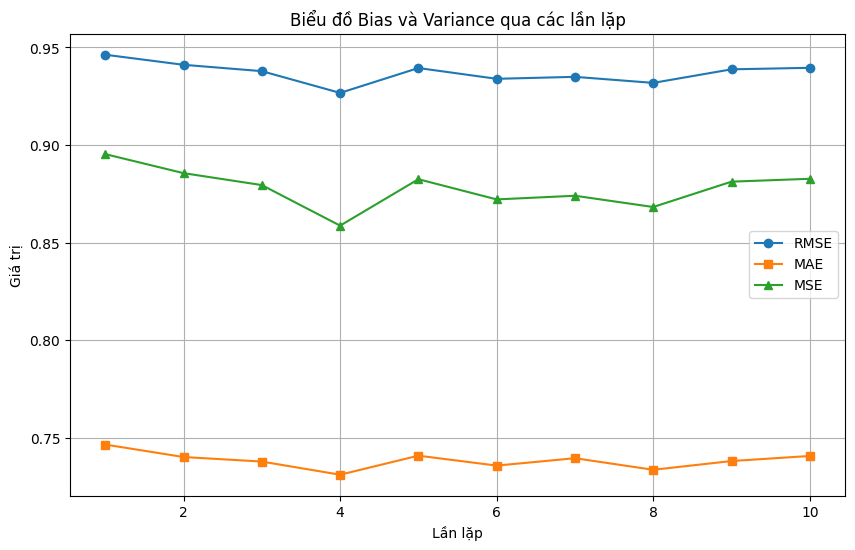

In [22]:
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.plot(iterations, mse_list, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
